# Homework 3

### Due: Sunday Oct 3, at 11:59pm via Blackboard

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Problem 1: Peformance of Large vs. Small Companies

Companies vary greatly in size. This variation can hide how well a company is performing. Rather than looking at the raw profit numbers, analysts consider financial ratios that adjust for the size of the company. A popular ratio is the return on assets, defined as:

**Return on Assets $= Net Income/Total Assets$**

Net income is another name for profits, and the total assets of a company is the value of everything it owns that is used to produce profits. The return on assets indicates how much profit the company generates relative to the amount that it invested to make that profit. A company with losses rather than profits has a negative return on assets. 

**Data:** The data set `Company.csv` gives the company name, total assets (in Millions \$), net income (in Millions \$), and the number of employees reported by 167 retailers in the United States. 

In the following questions, you will be performing an **exploratory data analysis (EDA)** for the given companies data. 

In [5]:
company = pd.read_csv('Company.csv')
company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees
0,1-800-FLOWERS.COM,256,-4,2200
1,99 CENTS ONLY STORES,824,74,12000
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710
3,ABERCROMBIE & FITCH -CL A,2948,150,85000
4,ADVANCE AUTO PARTS INC,3354,346,51017


### 1.1. (2 points) Compute and report (in a short paragraph of text) the following summary statistics for the `Net Income (M\$)` data (round your values to the nearest integer):

    - Mean
    - Median
    - Standard Deviation
    - Range
    - IQR 

In [6]:
c_income_mean = company['Net Income (M$)'].mean()
c_income_med = company['Net Income (M$)'].median()
c_income_sd = company['Net Income (M$)'].std()
c_income_range = company['Net Income (M$)'].max() - company['Net Income (M$)'].min()
c_income_iqr = company['Net Income (M$)'].quantile(0.75) - company['Net Income (M$)'].quantile(0.25)

print(f'From the given data, the average income of the companies is ${round(c_income_mean)}M while the median is only ${round(c_income_med)}M. \
The standard diviation is ${round(c_income_sd)}M. Besides, the companies\' income also has extremely wide range, ${round(c_income_range)}M. \
However, the IQR is only ${round(c_income_iqr)}M. We can imply from these statistics that the income data are vary and there are outliers in this data.')

From the given data, the average income of the companies is $334M while the median is only $34M. The standard diviation is $1385M. Besides, the companies' income also has extremely wide range, $17899M. However, the IQR is only $188M. We can imply from these statistics that the income data are vary and there are outliers in this data.


### 1.2. (2 points) Report the % of companies that inccured losses. For this question, you are expected to add a new categorical variable to the dataset (call it `Profit`) with two levels: `PROFIT` if the net income is above zero (net income >= 0) and `LOSS` if the net income is below zero (net income < 0). 



In [7]:
company['Profit'] = ['PROFIT' if i >= 0 else 'LOSS' for i in company['Net Income (M$)']]

company.head()

,Company Name,Total Assets (M$),Net Income (M$),# Employees,Profit
0,1-800-FLOWERS.COM,256,-4,2200,LOSS
1,99 CENTS ONLY STORES,824,74,12000,PROFIT
2,A.C. MOORE ARTS & CRAFTS INC,237,-30,4710,LOSS
3,ABERCROMBIE & FITCH -CL A,2948,150,85000,PROFIT
4,ADVANCE AUTO PARTS INC,3354,346,51017,PROFIT


### 1.3. (2 points) What is the shape of the distribution of the variable `Net Income (M$)`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier net income.

Text(1.05, 15000, 'All of black circles \nare outliers.')

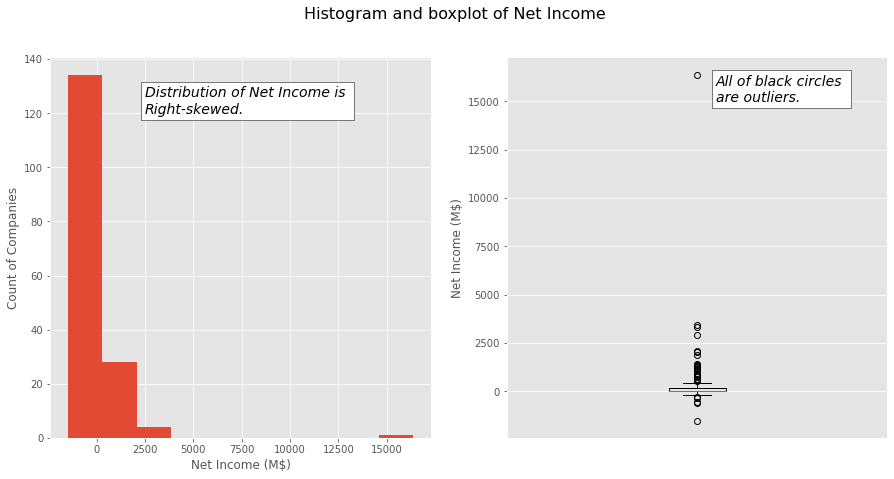

In [8]:
# company['Net Income (M$)'].plot(kind = 'hist')
# plt.boxplot(company['Net Income (M$)'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.hist(company['Net Income (M$)'])
ax2.boxplot(company['Net Income (M$)'])
ax1.set(ylabel = 'Count of Companies', xlabel = 'Net Income (M$)')
ax2.set_xticks([])
ax2.set(ylabel = 'Net Income (M$)')

fig.suptitle('Histogram and boxplot of Net Income', fontsize=16)
ax1.text(2500, 120, 'Distribution of Net Income is \nRight-skewed.', style='italic', fontsize=14,
        bbox= { 'facecolor':'white', 'ec': 'black'} )
ax2.text(1.05, 15000, 'All of black circles \nare outliers.', style='italic', fontsize=14,
        bbox= { 'facecolor':'white', 'ec': 'black'} )

### 1.4. (2 points) A company that has more than 5000 employees is considered a large one, otherwise it is cosidered small. Create a new categroical variable (call it `Company Size`) with two levels: `LARGE` if the number of employees is greater than 5000 (employees > 5000), and `SMALL` otherwise (employees <=5000). What is the % of large and small companies in the dataset?

In [9]:
company['Company Size'] =['LARGE' if i > 5000 else 'SMALL' for i in company['# Employees']]

company['Company Size'].value_counts(normalize = True)*100

LARGE    68.862275
SMALL    31.137725
Name: Company Size, dtype: float64

### 1.5. (2 points) Create a side-by-side boxplot to compare the distribtution of `Net Income (M$)` for both Large and Small companies. What does this graph tell you about the net income for both types of companies?

/Users/suwarath/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


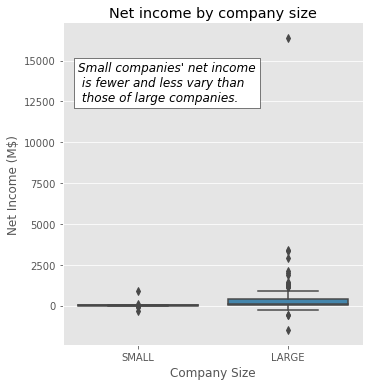

In [10]:
# company[['Company Size','Net Income (M$)']]
sns.factorplot(data = company[['Company Size','Net Income (M$)']],
               x = 'Company Size',
               y = 'Net Income (M$)',
               kind = 'box',
               )
plt.text(-0.4,12500,'Small companies\' net income\n is fewer and less vary than\n those of large companies.', bbox = {'fc': 'white', 'ec': 'black'},style='italic', fontsize=12)
plt.title('Net income by company size')
plt.show()

### 1.6. (3 points) A better way to assess the performance of companies is to look at their `Return on Assets` instead of looking only at net income. The return on assets indicates how much profit the company generates relative to the amount that it invested to make profits. 

- Create a new numerical variable (call it `Return on Assets`) based on the formula: **Return on Assets = Net Income/Total Assets**. 

- What is the shape of the distribution of the variable `Return on Assets`? For this question, you are expected to create **both** a histogram and a boxplot, and comment about the shape of the distribution and if there are any companies with an outlier return on assets value.

- Create a side-by-side boxplot to compare the distribtution of `Return on Assets` for both Large and Small companies. What does this graph tell you about the return on assets for both types of companies?

Text(-0.4, -0.4, "Small company's ROA is \nnormally distributed with\nonly one outlier. \nIn contrast, large company's \nROA is more vary and has\nmany outliers.")

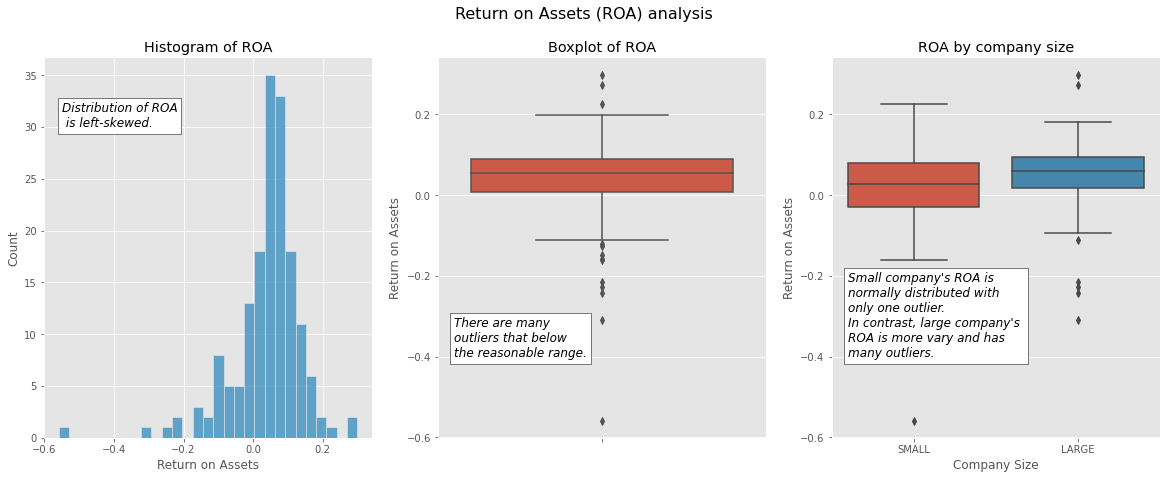

In [11]:
company['Return on Assets'] = company['Net Income (M$)']/company['Total Assets (M$)']

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
sns.histplot(data = company['Return on Assets'], ax = axes[0])
sns.boxplot(data = company[['Return on Assets']], y = 'Return on Assets', ax = axes[1])
sns.boxplot(data = company[['Company Size','Return on Assets']], x = 'Company Size', y = 'Return on Assets', ax = axes[2])
axes[0].set_title('Histogram of ROA')
axes[1].set_title('Boxplot of ROA')
axes[2].set_title('ROA by company size')

fig.suptitle('Return on Assets (ROA) analysis', fontsize = 16)
axes[0].text(-0.55, 30, 'Distribution of ROA\n is left-skewed.', style='italic', fontsize=12,
        bbox= { 'facecolor':'white', 'ec': 'black'} )
axes[1].text(-0.45, -0.4, 'There are many \noutliers that below \nthe reasonable range.', style='italic', fontsize=12,
        bbox= { 'facecolor':'white', 'ec': 'black'} )
axes[2].text(-0.4, -0.4, 'Small company\'s ROA is \nnormally distributed with\nonly one outlier. \nIn contrast, large company\'s \nROA is more vary and has\nmany outliers.', style='italic', fontsize=12,
        bbox= { 'facecolor':'white', 'ec': 'black'} )


### 1.7. (1 point) Which company has the least return on assets?

In [12]:
company.loc[company['Return on Assets'].idxmin(),['Company Name']]

Company Name    SCHOOL SPECIALTY INC
Name: 123, dtype: object

## Problem 2: Data Analytics Jobs in the USA

Soon you will start getting ready to explore the job market for data analyst/data scientist positions (internship and full time). In this case study, we will assess the job market in the USA, and in particular, we are interested to learn which business sectors and companies are looking to hire data analysts in different US states. This should get you started with your internship search for Summer 2022.

The data set (`DataAnalyst.csv`) is available for download from blackboard. It is scrapped and cleaned from GlassDoor using this [web scrapper](https://github.com/picklesueat/data_jobs_data/blob/master/glass_scraper.py). We will learn how to scrap data from the web in the second half of the semester.

The dataset has a sample of 2,253 job listings. The following table describes some of the variables necessary to answer the questions in this quiz:

|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`Job Title`| listing's job title
|`Job Description`| listing's job description
|`Rating`| the company's rating on Glassdoor
|`Company Name` | the listing company's name
|`City` | city location of the company 
|`State`| state location of the company
|`Size` | number of employees in the company 
|`Founded`| the year the company was founded
|`Type of ownership`| is the company private, public, non-profit, etc.?
|`Industry`| primary business activity 
|`Sector`| economic sector classification for the company
|`Revenue`| company's income generated from business operations
|`Competitors`| the company's list of competitors
|`Min_Salary`| the minimum salary listing for the position
|`Max_Salary`| the maximum salary listing for the position

**In this homework, we assume that the sample of 2,253 job listings is a representative of the population of job listings in the USA.**

In [13]:
DataAnalyst = pd.read_csv('DataAnalyst.csv')
DataAnalyst.head()

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,New York,NY,201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,37,66
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,New York,NY,501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,37,66


### 2.1 (1 point) What are the top 4 sectors with the highest count of job listings?

In [14]:
DataAnalyst['Sector'].value_counts().head(4)

Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Name: Sector, dtype: int64

### 2.2. (1 point) Suppose that you want to focus your job search in the following sectors (Information Technology, Business Services, Finance,  Health Care). Create a subset of the given dataset that include only these 4 sectors with their data (include all variables).

*Name the subset dataframe `mydata`.*

In [15]:
mydata = DataAnalyst[DataAnalyst['Sector'].isin(['Information Technology', 'Business Services', 'Finance',  'Health Care'])]
mydata.head()

,Job Title,Job Description,Rating,Company Name,City,State,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,New York,NY,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,New York,NY,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,37,66
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,New York,NY,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,New York,NY,1001 to 5000 employees,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66
6,Business/Data Analyst (FP&A),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,New York,NY,1001 to 5000 employees,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,37,66


### 2.3 (2 points) You are given the range of salary for each job listing (minimum and maximum salary). Add a new variable to `mydata` to estimate the salary of the for each of the listing in the dataset. The estimate salary is the average of the given minimum and maximum salary.

*Name the the new column `Est_Salary`.*

What is the **average**, and **standard deviation** for the estimated salary among the 4 sectors listed in `mydata` dataframe?

In [16]:
mydata['Est_Salary'] = (mydata['Max_Salary']+mydata['Min_Salary'])/2

/var/folders/1c/xy5l3bvx653590381s90cwv80000gn/T/ipykernel_3653/1521362959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Est_Salary'] = (mydata['Max_Salary']+mydata['Min_Salary'])/2


In [17]:
Est_Salary_mean = mydata['Est_Salary'].mean()
Est_Salary_std = mydata['Est_Salary'].std()

print(f'Average of Est_Salary is {Est_Salary_mean}. Standard Diviation of Est_Salary is {Est_Salary_std}.')

Average of Est_Salary is 72.52192362093352. Standard Diviation of Est_Salary is 24.240090092766003.


### 2.4 (2 points) Create a side-by-side boxplot to show the distribution of salaries among the four hiring sectors (listed in `mydata`). What does the boxplot tell you about the salaries in these industries for data analysts?

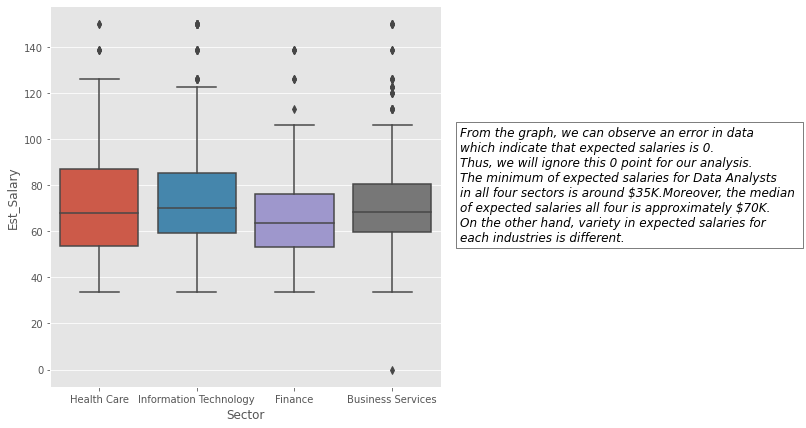

In [18]:
plt.figure(figsize = (7,7))
ax = sns.boxplot(data = mydata, x = 'Sector', y = 'Est_Salary')
plt.text(3.7,80,
         'From the graph, we can observe an error in data \nwhich indicate that expected salaries is 0.\n\
Thus, we will ignore this 0 point for our analysis.\n\
The minimum of expected salaries for Data Analysts \nin all four sectors is around $35K.\
Moreover, the median \nof expected salaries all four is approximately $70K.\n\
On the other hand, variety in expected salaries for \neach industries is different.'
         ,va = 'center',style='italic', fontsize=12
         ,bbox= { 'facecolor':'white', 'ec': 'black'})
plt.show()

### 2.5 (2 points) List the company names (distinct) in the **Information Technology** sector has job postings with estimated salaries above 100K dollars?

In [19]:
mydata['Company Name'][(mydata['Sector'].isin(['Information Technology'])) & (mydata['Est_Salary'] > 100)].drop_duplicates().reset_index()

,index,Company Name
0,340,Criteo
1,344,Tekfortune Inc.
2,346,"Staffigo Technical Services, LLC"
3,347,"8K Miles Software Services, Inc."
4,349,VTS
5,361,RMS Computer Corporation
6,370,Reliable Software Resources
7,378,Oracle
8,380,Avani Technology Solutions
9,381,Primesoft


### 2.6 (3 points) Use the dataset with the 4 sectors (`mydata`) to create a dot plot (lollipop plot) that shows the top 15 states with the highest average salaries.

*Name the dataframe `top15states`*

*The resulting dataframe should have two columns (`State`, `Avg Salary`), where `Avg Salary` is the mean salary in the corresponding `State`*

*Use two different colors of your choice to distingusih between the states with avegrage salary larger than \$75K and thos with average salary less than \$75K.* 

In [20]:
top15states = (mydata.loc[:,['State','Est_Salary']]).groupby('State').mean().sort_values('Est_Salary', ascending = False).reset_index().head(15)
top15states.columns = ['State','Avg Salary']
# top15states

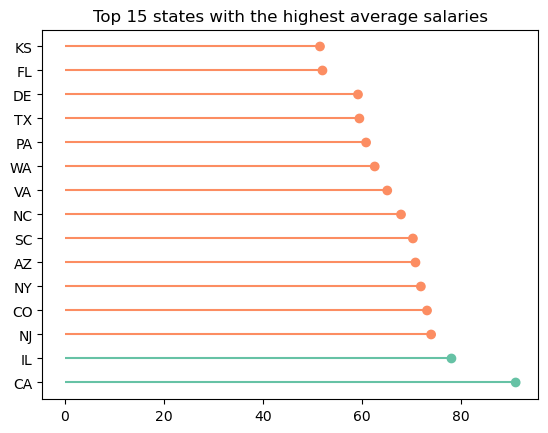

In [21]:
plt.style.use('default')
color = ['#fc8d62' if i < 75 else '#66c2a5' for i in top15states['Avg Salary']]
plt.hlines(y = top15states['State'], xmin = 0, xmax = top15states['Avg Salary'], colors = color)
plt.scatter(top15states['Avg Salary'], top15states['State'], color = color)
plt.title('Top 15 states with the highest average salaries')
plt.show()